# Homework for week-5

# Import or Load modules 

In [46]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import pickle
from IPython import display
import requests

%matplotlib inline

In [2]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction import DictVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, f1_score
# from sklearn.metrics import roc_curve, roc_auc_score, auc
# from sklearn.model_selection import KFold

***

# Question 1: Version of Pipenv

`pipenv, version 2022.10.10`

***

# Question 2: Checksum for Scikit-Learn 1.0.2

sha256:08ef968f6b72033c16c479c966bf37ccd49b06ea91b765e1cc27afefe723920b

In [4]:
# Path to file: Pipfile.lock 
PATH_TO_Pipfile = './05_homework/Pipfile.lock'

In [35]:
%cat $PATH_TO_Pipfile

{
    "_meta": {
        "hash": {
            "sha256": "394a87147ddc7e050227fd206115e528bbe9c7502a20ae7a5206c0bf78f528cc"
        },
        "pipfile-spec": 6,
        "requires": {
            "python_version": "3.9"
        },
        "sources": [
            {
                "name": "pypi",
                "url": "https://pypi.org/simple",
                "verify_ssl": true
            }
        ]
    },
    "default": {
        "certifi": {
            "hashes": [
                "sha256:0d9c601124e5a6ba9712dbc60d9c53c21e34f5f641fe83002317394311bdce14",
                "sha256:90c1a32f1d68f940488354e36370f6cca89f0f106db09518524c88d6ed83f382"
            ],
            "markers": "python_version >= '3.6'",
            "version": "==2022.9.24"
        },
        "charset-normalizer": {
            "hashes": [
                "sha256:5a3d016c7c547f69d6f81fb0db9449ce888b418b5b9952cc5e6e66843e9dd845",
                "sha256:83e9a75d1911279afd89352c68b45348559d1fc0506b054b346651b5e7f

***

# Models - download

In [25]:
!wget https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/05-deployment/homework/dv.bin?raw=true -O 05_homework/dv.bin

--2022-10-10 17:22:24--  https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/05-deployment/homework/dv.bin?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/alexeygrigorev/mlbookcamp-code/raw/master/course-zoomcamp/cohorts/2022/05-deployment/homework/dv.bin [following]
--2022-10-10 17:22:25--  https://github.com/alexeygrigorev/mlbookcamp-code/raw/master/course-zoomcamp/cohorts/2022/05-deployment/homework/dv.bin
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/course-zoomcamp/cohorts/2022/05-deployment/homework/dv.bin [following]
--2022-10-10 17:22:25--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/course-zoomcamp/cohorts/2022/05-deploymen

In [26]:
!wget https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/05-deployment/homework/model1.bin?raw=true -O 05_homework/model1.bin

--2022-10-10 17:22:52--  https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/05-deployment/homework/model1.bin?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/alexeygrigorev/mlbookcamp-code/raw/master/course-zoomcamp/cohorts/2022/05-deployment/homework/model1.bin [following]
--2022-10-10 17:22:52--  https://github.com/alexeygrigorev/mlbookcamp-code/raw/master/course-zoomcamp/cohorts/2022/05-deployment/homework/model1.bin
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/course-zoomcamp/cohorts/2022/05-deployment/homework/model1.bin [following]
--2022-10-10 17:22:52--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/course-zoomcamp/cohorts/2

***

# Question 3: 
Write a script for laoding these modesl with pickle

In [27]:
PATH_to_dv    = '05_homework/dv.bin'
PATH_to_model = '05_homework/model1.bin'

In [28]:
client = {"reports": 0, "share": 0.001694, "expenditure": 0.12, "owner": "yes"}
client

{'reports': 0, 'share': 0.001694, 'expenditure': 0.12, 'owner': 'yes'}

In [29]:
def load_pickle(filename, verbose=True):
    with open(filename, 'rb') as f_in:
        model = pickle.load(f_in)
        if (verbose): print(f' >>> Pickle file [Loaded]: \n\t - File: {filename}')
    return model

In [31]:
# Load DictVectorizer
dv = load_pickle(PATH_to_dv)

 >>> Pickle file [Loaded]: 
	 - File: 05_homework/dv.bin


In [33]:
# Load Model
model = load_pickle(PATH_to_model)

 >>> Pickle file [Loaded]: 
	 - File: 05_homework/model1.bin


In [34]:
# Prediction on client
X = dv.transform([client])
y_pred = model.predict_proba(X)[0,1]

print(y_pred)

0.16213414434326598


***

# Question 4:  
Probability of getting a credit card (Flask)

## Webservice running locally

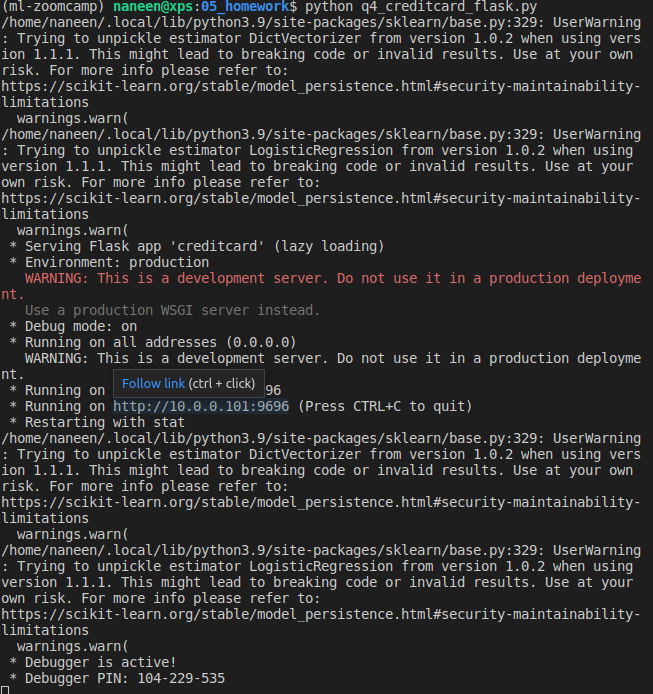

In [44]:
display.Image("./05_homework/flask_local_creditcard.png")

In [51]:
# Run Prediction
!python3 ../ipynb/05_homework/q4_creditcard_test.py

{'approval_cc': True, 'creditcard_probability': 0.9282218018527452}


***

# Question 5:  
Size of the base image is **125MB**

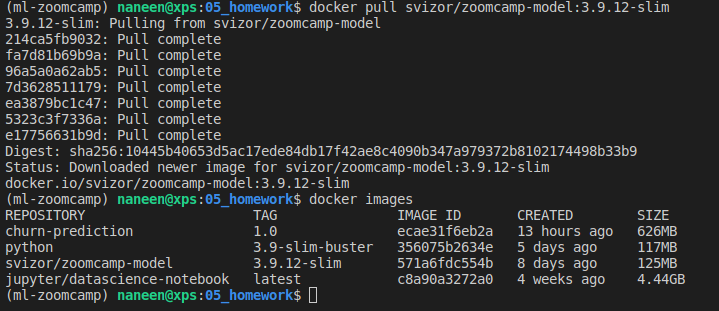

In [53]:
display.Image("./05_homework/q5_docker_pull.png")

***

# Question 6:  
Probability of getting a credit card (Docker)

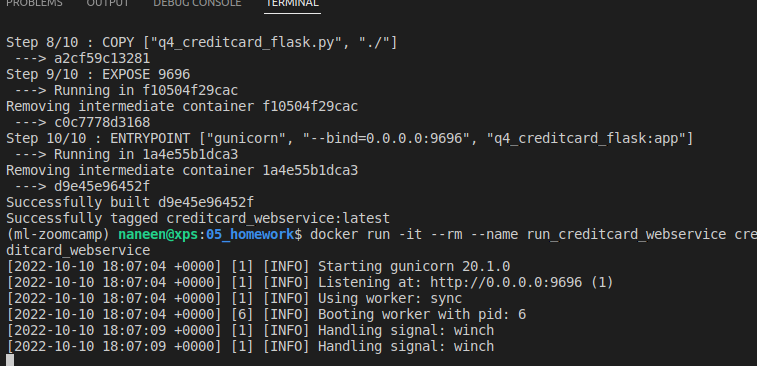

In [54]:
display.Image("./05_homework/q6_docker_webserver.png")

In [65]:
# Run Prediction
!python3 ./05_homework/q6_creditcard_test.py

{'approval_cc': True, 'creditcard_probability': 0.9282218018527452}
